In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://github.com/bipulshahi/Dataset/raw/refs/heads/main/Advertising.csv',
                 index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Build and evaluate a model to predict sales using TV & radio advertisement costs**

In [ ]:
X = df[['TV', 'radio']]
y = df['sales']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size=0.75)

In [ ]:
from sklearn.linear_model import LinearRegression             #Import linear regression library
modelA = LinearRegression()                                    #Define model to be trained
modelA.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
print(modelA.coef_)
print(modelA.intercept_)

[0.04598348 0.17965615]
3.0227350100700683


In [ ]:
tv_expense = 34.5
radio_expense = 55.7

print(3.023 + 0.046 * tv_expense + 0.180 * radio_expense)

print(modelA.predict([[tv_expense, radio_expense]]))

14.636
[14.61601274]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Evaluate the error
#predicted sales on data used for training
ytrainP = modelA.predict(xtrain)

#predicted sales on data no used for training
ytestP = modelA.predict(xtest)

In [ ]:
#difference between real and predicted sales
maeTrain = abs(ytrain - ytrainP).mean()
print("Mean Absolute Error, Train", maeTrain)


maeTest = abs(ytest - ytestP).mean()
print("Mean Absolute Error, Test", maeTest)

Mean Absolute Error, Train 1.2796530025883863
Mean Absolute Error, Test 1.2616570408003605


**Build and evaluate the regression model performance when build using 3 features - TV, radio & newspaper**

In [ ]:
X = df[['TV', 'radio' , 'newspaper']]
y = df['sales']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size=0.75)

from sklearn.linear_model import LinearRegression             #Import linear regression library
modelB = LinearRegression()                                    #Define model to be trained
modelB.fit(xtrain,ytrain)

#Evaluate the error
#predicted sales on data used for training
ytrainP = modelB.predict(xtrain)

#predicted sales on data no used for training
ytestP = modelB.predict(xtest)

#difference between real and predicted sales
maeTrain = abs(ytrain - ytrainP).mean()
print("Mean Absolute Error, Train", maeTrain)


maeTest = abs(ytest - ytestP).mean()
print("Mean Absolute Error, Test", maeTest)

Mean Absolute Error, Train 1.267813437052904
Mean Absolute Error, Test 1.2734955652623463


In [ ]:
print(modelB.coef_)

[ 0.04477436  0.18490374 -0.00196863]


**Feature Importance**
  * pairplot
  * correlation

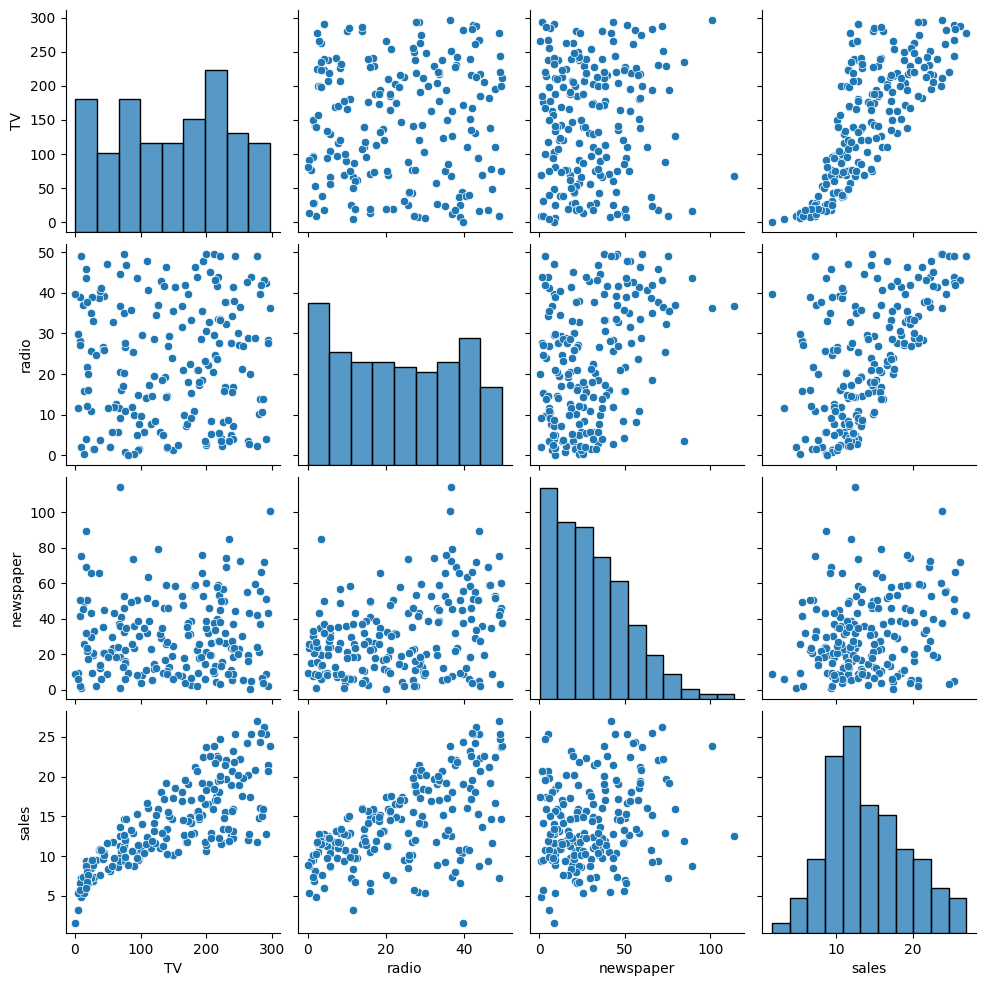

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
#calculate correlation mathematically
x1 = df['TV']
y = df['sales']

n1 = ((x1 - x1.mean()) * (y - y.mean())).sum()

d1 = (((x1 - x1.mean())**2).sum() *  ((y - y.mean())**2).sum())**0.5

c1 = n1/d1
print(c1)

0.7822244248616064


**Model build using only TV and radio expense is good here**

In [ ]:
X = df[['TV', 'radio']]
y = df['sales']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size=0.75)

from sklearn.linear_model import LinearRegression             #Import linear regression library
modelC = LinearRegression()                                    #Define model to be trained
modelC.fit(xtrain,ytrain)

#Evaluate the error
#predicted sales on data used for training
ytrainP = modelC.predict(xtrain)

#predicted sales on data no used for training
ytestP = modelC.predict(xtest)

#difference between real and predicted sales
maeTrain = abs(ytrain - ytrainP).mean()
print("Mean Absolute Error, Train", maeTrain)


maeTest = abs(ytest - ytestP).mean()
print("Mean Absolute Error, Test", maeTest)

Mean Absolute Error, Train 1.2788285428162878
Mean Absolute Error, Test 1.14900244430073


**Non-Linear Regression**

In [ ]:
import numpy as np

x = np.array([3,6,4,9,2]).reshape(5,1)   #Feature
y = np.array([7,8,6,10,5])      #Target

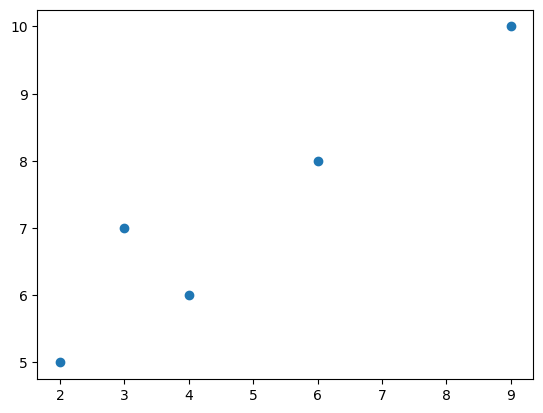

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [ ]:
print(x)

[[3]
 [6]
 [4]
 [9]
 [2]]


In [ ]:
xn = np.hstack((x , x**2 , x**3))
xn

array([[  3,   9,  27],
       [  6,  36, 216],
       [  4,  16,  64],
       [  9,  81, 729],
       [  2,   4,   8]])

In [ ]:
from sklearn.linear_model import LinearRegression
model_nl_A = LinearRegression()
model_nl_A.fit(xn, y)       #Using transformed data (non-linear) for training

LinearRegression()

In [ ]:
print(model_nl_A.coef_)

[ 1.8128775  -0.25070982  0.01575809]


In [ ]:
xt = np.linspace(1,10,5).reshape(5,1)            #define a new sequential data for prediction
xt = np.hstack((xt, xt**2 , xt**3))

In [ ]:
xt

array([[   1.      ,    1.      ,    1.      ],
       [   3.25    ,   10.5625  ,   34.328125],
       [   5.5     ,   30.25    ,  166.375   ],
       [   7.75    ,   60.0625  ,  465.484375],
       [  10.      ,  100.      , 1000.      ]])

In [ ]:
yn = model_nl_A.predict(xt)

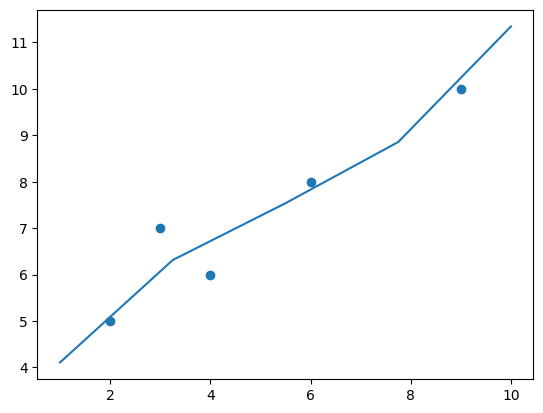

In [ ]:
plt.scatter(x,y)

plt.plot(xt[:,0:1] , yn)

plt.show()

**Build a non-linear regression model using TV as feature and sales as target**

In [ ]:
X = df[['TV']]
y = df['sales']

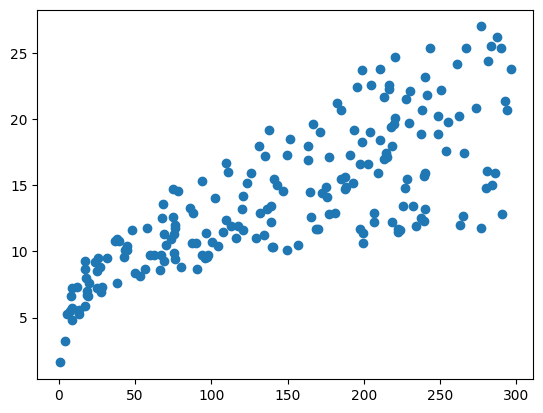

In [ ]:
plt.scatter(X,y)
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree = 3, include_bias=False)
pol.fit(X)

Xt = pol.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xt,y)

In [ ]:
xtrain

array([[8.83000000e+01, 7.79689000e+03, 6.88465387e+05],
       [1.99800000e+02, 3.99200400e+04, 7.97602399e+06],
       [2.56000000e+01, 6.55360000e+02, 1.67772160e+04],
       [1.96000000e+01, 3.84160000e+02, 7.52953600e+03],
       [9.42000000e+01, 8.87364000e+03, 8.35896888e+05],
       [7.47000000e+01, 5.58009000e+03, 4.16832723e+05],
       [1.80800000e+02, 3.26886400e+04, 5.91010611e+06],
       [5.35000000e+01, 2.86225000e+03, 1.53130375e+05],
       [2.53800000e+02, 6.44144400e+04, 1.63483849e+07],
       [1.71300000e+02, 2.93436900e+04, 5.02657410e+06],
       [2.24000000e+02, 5.01760000e+04, 1.12394240e+07],
       [1.87000000e+01, 3.49690000e+02, 6.53920300e+03],
       [2.68000000e+01, 7.18240000e+02, 1.92488320e+04],
       [6.90000000e+01, 4.76100000e+03, 3.28509000e+05],
       [1.70200000e+02, 2.89680400e+04, 4.93036041e+06],
       [6.61000000e+01, 4.36921000e+03, 2.88804781e+05],
       [1.34300000e+02, 1.80364900e+04, 2.42230061e+06],
       [2.40100000e+02, 5.76480

In [ ]:
model_nl_B = LinearRegression()
model_nl_B.fit(xtrain , ytrain)

LinearRegression()

In [ ]:
print(X['TV'].min() , X['TV'].max())

0.7 296.4


In [ ]:
Xp = np.linspace(0,300,100).reshape(100,1)
Xps = np.hstack((Xp, Xp**2 , Xp**3))

In [ ]:
Yps = model_nl_B.predict(Xps)

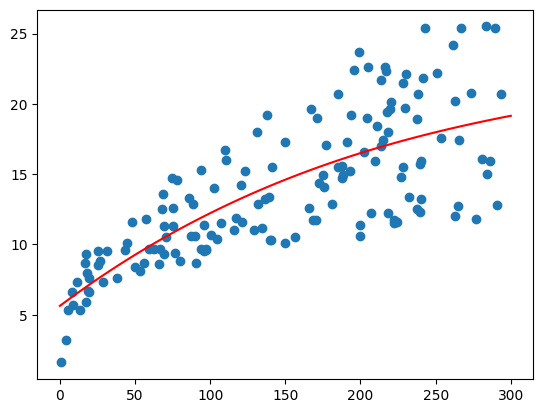

In [ ]:
plt.scatter(xtrain[:,0:1], ytrain)

plt.plot(Xp, Yps, 'r')

plt.show()

In [ ]:
print(model_nl_B.coef_)

[ 7.99272045e-02 -1.51412828e-04  1.17422245e-07]


In [ ]:
ytrainP = model_nl_B.predict(xtrain)
ytestP = model_nl_B.predict(xtest)

In [ ]:
mae_train = abs(ytrain - ytrainP).mean()
mae_test = abs(ytest - ytestP).mean()
print(mae_train , mae_test)

2.603846859011306 2.4952441695838607


**Implement and train Non-linear regression model using two features - (TV & radio)**
  - Evaluate the model performance